**Srinivas Naidu Pasyavula <br>
QC61851**
<br><br>
Dr. Tony Diana <br>
DATA 690 Introduction to NLP <br>
Homework, Week 9<br><br>

In [1]:
# This code mounts your Google Drive to the Colab notebook, changes the directory to a specific folder on your Drive, and lists the contents of that folder using the ls command.

#!hostname -I
from google.colab import drive
drive.mount('/content/drive')
#
%cd /content/drive/MyDrive/'Colab Notebooks'/'NLP DATA 690 UMBC'/'week9'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/NLP DATA 690 UMBC/week9
 Europe_Covid.txt  'QC61851-Srinivas Naidu Pasyavula-NLP-Week 9- HW.ipynb'


# **Exercise - 1**

## Import necessary libraries

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## Loading Pairs for comparison

In [4]:
pair1 = ["What you do defines you", "Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

## Compute the Jaccard similarity index

In [5]:
def jaccard_similarity(doc1, doc2):
    lemmatizer = WordNetLemmatizer()

    words_doc1 = set([lemmatizer.lemmatize(word) for word in word_tokenize(doc1.lower())])
    words_doc2 = set([lemmatizer.lemmatize(word) for word in word_tokenize(doc2.lower())])

    intersection = len(words_doc1.intersection(words_doc2))
    union = len(words_doc1.union(words_doc2))

    return intersection / union

## Jaccard similarity index between pair1[0] and pair1[1]

In [6]:
similarity_pair1 = jaccard_similarity(pair1[0], pair1[1])
print(f"Jaccard similarity between pair1[0] and pair1[1]: {similarity_pair1}")

Jaccard similarity between pair1[0] and pair1[1]: 0.14285714285714285


---

# **Exercise - 2**

In [7]:
!pip install python-Levenshtein

In [8]:
import Levenshtein

In [9]:
string1 = "I cannot believe what he said"
string2 = "I believe it is not what he said"

In [10]:
distance = Levenshtein.distance(string1, string2)
print(f"Levenshtein distance: {distance}")

Levenshtein distance: 15


**Note -**
The Levenshtein distance of 15 between the strings "I cannot believe what he said" and "I believe it is not what he said" indicates that many single-character edits are required to transform one string into the other.

---

# **Exercise - 3**

In [11]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import re

In [12]:
# Load the data from the Europe_Covid.txt file

file_path = 'Europe_Covid.txt'

try:
    with open(file_path, 'r') as file:
        text = file.read()
        display(text)
except FileNotFoundError:
    print("The file was not found/ Provided the incorrect file path.")

'European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe\'s political class. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda said that he was feeling well, was asymptomatic and would continue working in isolation. "As you can see, I am full of strength. I hope it will stay this way. However, the fact is that I must isolate. Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday. "I would like to apologize to all of those, who have to go through quarantine procedures in connection to meeting with me in recent days ... I hope none of you get sick." The Polish President used the video to appeal to people to be especially careful of senior citizens, as they were particularly at risk from Covid-19. Duda\'s dia

In [13]:
# Tokenize the text into words
words = word_tokenize(text)

In [14]:
# Preprocess the words: Remove non-alphabetic characters and convert to lowercase
words = [word.lower() for word in words if re.match('^[a-zA-Z]+$', word)]

In [15]:
# Train the Word2Vec model
model = Word2Vec([words], vector_size=100, window=5, min_count=1, sg=0)

In [16]:
# Finding most similar words to 'government' and 'curfew'
similar_to_government = model.wv.most_similar('government')
similar_to_curfew = model.wv.most_similar('curfew')

In [17]:
print("Words similar to 'government':", [word[0] for word in similar_to_government])
print("Words similar to 'curfew':", [word[0] for word in similar_to_curfew])

Words similar to 'government': ['record', 'through', 'france', 'over', 'analyzed', 'scientific', 'include', 'rate', 'am', 'than']
Words similar to 'curfew': ['picture', 'saturday', 'together', 'prime', 'fight', 'will', 'people', 'averages', 'by', 'the']


---

# **Exercise - 4**

In [18]:
!pip install textblob

In [19]:
from textblob import TextBlob

In [20]:
# Create a TextBlob object with the text
blob = TextBlob(text)

In [21]:
# Get the sentiment polarity and subjectivity
sentiment = blob.sentiment
subjectivity = blob.sentiment.subjectivity

In [22]:
print(f"Sentiment Polarity: {sentiment.polarity}")
print(f"Subjectivity: {subjectivity}")


Sentiment Polarity: 0.04992382294707877
Subjectivity: 0.3476432095036746


---

# **Exercise - 5**

In [23]:
!pip install wordcloud matplotlib nltk

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [26]:
# Read the content of 'Europe_Covid.txt' into the 'text' variable
with open('Europe_Covid.txt', 'r') as file:
    text = file.read()

In [27]:
# Tokenize the text into words
words = word_tokenize(text)

In [28]:
# Remove non-alphabetic and stop words
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in words if re.match('^[a-zA-Z]+$', word) and word.lower() not in stop_words]

In [29]:
# Create a dictionary of word frequencies
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

In [30]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

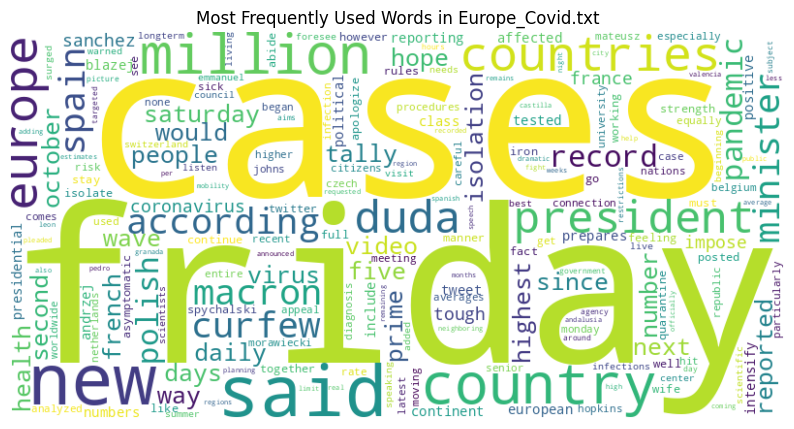

In [31]:
# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words in Europe_Covid.txt')
plt.show()

---

# **Exercise - 6**

In [32]:
!pip install nltk

In [33]:
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
# Read the content of 'Europe_Covid.txt' into the 'text' variable
with open('Europe_Covid.txt', 'r') as file:
    text = file.read()

In [35]:
# Tokenize the text into sentences
sentences = sent_tokenize(text)

In [36]:
# Create a CountVectorizer to transform the text into a matrix of token counts
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(sentences)

In [37]:
# Calculate cosine similarity between sentences
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [38]:
# Generate the summary
num_sentences = 5  # Number of sentences in the summary
sentence_ranks = sorted(enumerate(cosine_sim[0]), key=lambda x: x[1], reverse=True)
top_sentence_indices = [rank[0] for rank in sentence_ranks[1:num_sentences + 1]]
summary = ' '.join([sentences[i] for i in sorted(top_sentence_indices)])

In [39]:
# Print the summary
print("Extractive Summary:\n")
display(summary)

Extractive Summary:



"The Polish President used the video to appeal to people to be especially careful of senior citizens, as they were particularly at risk from Covid-19. Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began. The five countries with the highest rate of infection worldwide are all in Europe, according to Johns Hopkins University's latest moving averages, as analyzed by CNN.The worst-hit nations are the Czech Republic, Belgium, the Netherlands, Switzerland and France.In all five countries, the number of new infections has surged since the beginning of October. On the same day France reported 42,032 new cases in 24 hours, a new record, according to the French Health Agency. The region of Andalusia has also requested a curfew for the city of Granada."

---

# **Exercise - 7**

In [40]:
!pip install transformers

In [41]:
from transformers import BartForSequenceClassification, BartTokenizer
import torch

In [42]:
# Define the model and tokenizer for zero-shot classification
model = BartForSequenceClassification.from_pretrained('facebook/bart-large-mnli')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-mnli')

In [43]:
# Define the candidate labels for classification
candidate_labels = ["informational", "query", "advocacy", "not informational"]

In [44]:
# Tokenize the text and candidate labels
inputs = tokenizer(text, candidate_labels, return_tensors='pt', padding=True, truncation=True)

In [45]:
# Perform classification
with torch.no_grad():
    outputs = model(**inputs)

In [46]:
# Get the predicted labels
predicted_labels = candidate_labels[torch.argmax(outputs.logits)]

In [47]:
print(f"The predicted category for the text is: {predicted_labels}")

The predicted category for the text is: advocacy


---